In [1]:
import gym
from gym.envs.registration import register
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True})
env = gym.make('D4x4-FrozenLake-v0')

In [2]:
gamma = 0.9
import numpy as np
Q = np.random.random([env.nS, env.nA])
def eps_action(eps):
    a = np.random.uniform(0, 1)
    if a < eps:
        return True
    return False
        

In [3]:
q_star = np.array([[0.06889149,0.06664856,0.06664856,0.05975949],\
                   [0.03909201,0.04299052,0.04074759,0.06141507],\
                   [0.07441012,0.0688294,0.07272791,0.05748993],\
                   [0.03906539,0.03906539,0.03348467,0.05580772],\
                   [0.09185507,0.0711876,0.06429853,0.04822402],\
                   [0,         0,         0,         0,        ],\
                   [0.1122084,0.08988535,0.1122084,0.02232305],\
                   [0.,         0.,         0.,         0.,        ],\
                   [0.0711876,0.11788024,0.10180573,0.14543678],\
                   [0.1576119 ,0.24749724, 0.20386619, 0.1335164 ],\
                   [0.2996178,  0.26595527, 0.22536861, 0.10791171],\
                   [0.        , 0.         ,0.         ,0.        ],\
                   [0.         ,0.         ,0.         ,0.        ],\
                   [0.18823003 ,0.30568692 ,0.37993611 ,0.26595527],\
                   [0.39557227 ,0.63902026 ,0.61492476 ,0.53719952],\
                   [0.         ,0.         ,0.         ,0.        ]])


In [4]:
Q = np.random.random([env.nS, env.nA])
import math
state=env.reset() #Reset the env
max_step= 20
max_itr = 100000
eps_a = np.exp(-1*np.linspace(1, 5, max_itr))
alpha_a = np.exp(-1*np.linspace(0.03, 5, max_itr))
R_cum = []
q_arr = []
for i in range(1,max_itr):
    eps = eps_a[i]
    #eps = 0.1
    alpha = alpha_a[i]
   # alpha = 0.95
    r_total = 0
    for step in range(max_step):
        if eps_action(eps):
            action=env.action_space.sample() #Random Action
           # print('random')
        else:
            action = np.argmax(Q[state][:])
        n_state,reward,terminal,_=env.step(action) #Take a step
        r_total = r_total + reward
        Q[state][action] = Q[state][action] + alpha*(reward + gamma*np.max(Q[n_state][:]) - Q[state][action])
      #  print('State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
        state=n_state 
        if terminal:
            Q[state][:] = 0
            state = env.reset()
            break
    q_arr.append(np.linalg.norm(Q-q_star))
    R_cum.append(r_total)
    

In [5]:
Q

array([[0.06468511, 0.06486806, 0.06850373, 0.05903454],
       [0.03887703, 0.03685561, 0.04185801, 0.06327944],
       [0.07685074, 0.06095661, 0.06134751, 0.05330958],
       [0.03715031, 0.03564646, 0.03001562, 0.04954886],
       [0.09273382, 0.07458912, 0.06806361, 0.05058353],
       [0.        , 0.        , 0.        , 0.        ],
       [0.08188474, 0.06991945, 0.11467955, 0.0210834 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.06097072, 0.10754346, 0.10273351, 0.14857948],
       [0.16796074, 0.25716303, 0.21275733, 0.14370553],
       [0.31155255, 0.22574988, 0.21986703, 0.10730743],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18609781, 0.28549579, 0.40383428, 0.24872494],
       [0.40275585, 0.68913199, 0.54425708, 0.53361952],
       [0.        , 0.        , 0.        , 0.        ]])

In [6]:
import matplotlib.pyplot as plt
plt.plot(R_cum)
plt.title(F'Commulative reward vs num of iteration')

Text(0.5, 1.0, 'Commulative reward vs num of iteration')

In [7]:
print(q_arr)

[3.464415444711522, 3.3597744672329113, 3.182675213750401, 3.097492139025897, 2.9052799111733236, 2.8369712846822694, 2.7837484801954293, 2.858576571016407, 2.7734242790624872, 2.6997903590989303, 2.667604722728425, 2.666878401003592, 2.6885282935826416, 2.6753411589254554, 2.629665809578704, 2.6083541418800116, 2.620158818413817, 2.5571446150164485, 2.537805311113012, 2.5133659957354904, 2.541243942976996, 2.506713604253463, 2.4542101284216593, 2.472035375627048, 2.409172293975258, 2.3961900704055856, 2.347378513162206, 2.3483375399244775, 2.3775803996151184, 2.3336141750969657, 2.3355644261627826, 2.324832287916602, 2.234914909565486, 2.2044414433712833, 2.162815992429864, 2.1266276778838438, 2.1487182521988584, 2.1985629852453936, 2.1627132941222063, 2.1545821675047963, 2.1214085360237025, 2.0507212980151954, 2.0590521940232813, 2.025840341670718, 1.988126579908458, 1.8791921254008441, 1.8464805418198487, 1.7403420011894892, 1.7011833510395997, 1.6671278790859452, 1.6320197479226108

Text(0.5, 1.0, 'Q_err vs unmber of iterations')

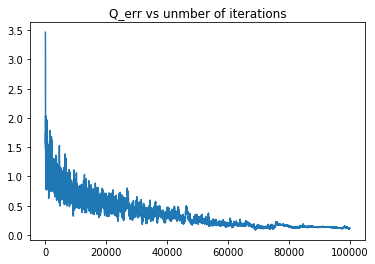

In [8]:
plt.plot(q_arr)
plt.title(F'Q_err vs unmber of iterations')

In [9]:
pi_star = np.argmax(Q,1)
v_star = np.max(Q,1)
import seaborn
import matplotlib.pyplot as plt
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 4):
        for i in range(0, 4):
            if policy_int[counter]==1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_int[counter]==3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_int[counter]==0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

Value Function [0.06850373 0.06327944 0.07685074 0.04954886 0.09273382 0.
 0.11467955 0.         0.14857948 0.25716303 0.31155255 0.
 0.         0.40383428 0.68913199 0.        ]
Policy [2 3 0 3 0 0 2 0 3 1 0 0 0 2 1 0]


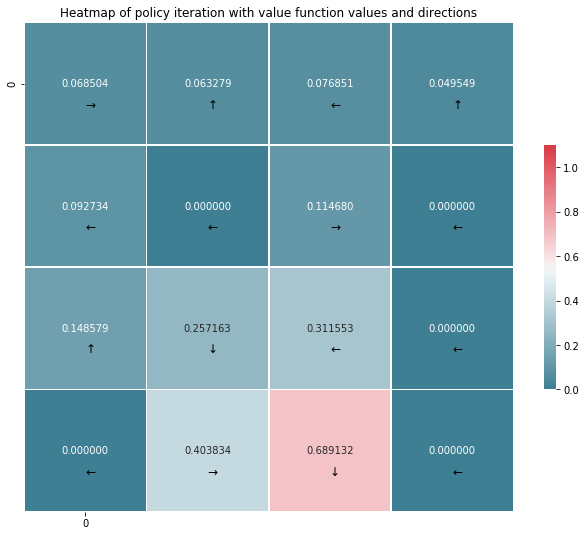

Final policy: [2 3 0 3 0 0 2 0 3 1 0 0 0 2 1 0]


In [10]:
v_star = np.max(Q,1)
pi_star = np.argmax(Q,1)
fancy_visual(v_star, pi_star)
print(F'Final policy: {pi_star}')

In [11]:
win_size = 1000
w = np.ones(win_size)
def moving_average(data_set, periods=3):
    weights = np.ones(periods) / periods
    return np.convolve(data_set, weights, mode='valid')

In [12]:
q_moving_err = moving_average(q_arr, win_size)
r_moving_err = moving_average(R_cum, win_size)

Text(0.5, 1.0, 'moving average error between q and q_star for window size: 1000')

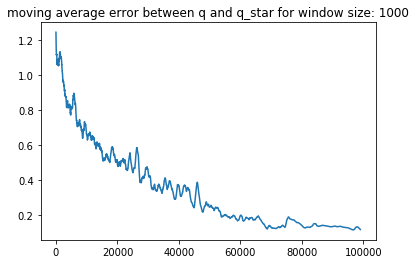

In [13]:
plt.plot(q_moving_err)
plt.title(F'moving average error between q and q_star for window size: {win_size}')

Text(0.5, 1.0, 'moving average commulated expected reward for window size: 1000')

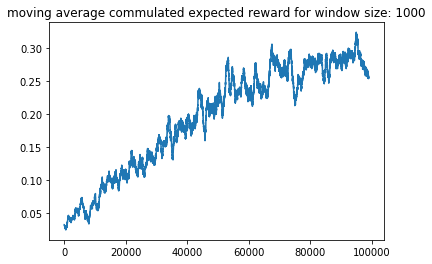

In [14]:
plt.plot(r_moving_err)
plt.title(F'moving average commulated expected reward for window size: {win_size}')

In [15]:
np.min(q_arr)

0.08573560581949664

In [16]:
q_arr[-1]

0.11380368193153714